In [18]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
zf = zipfile.ZipFile("data\playground-series-s3e22.zip")

In [20]:
zf.namelist()

['sample_submission.csv', 'test.csv', 'train.csv']

In [21]:
train_df = pd.read_csv(zf.open("train.csv"))

In [22]:
train_df.head(5)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [23]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,1235.0,617.000000,3.566581e+02,0.0,308.5,617.0,925.5,1234.0
hospital_number,1235.0,954500.401619,1.356403e+06,521399.0,528800.0,529777.0,534145.0,5305129.0
rectal_temp,1235.0,38.202186,7.886678e-01,35.4,37.8,38.2,38.6,40.8
pulse,1235.0,79.574089,2.910864e+01,30.0,53.0,76.0,100.0,184.0
respiratory_rate,1235.0,30.054251,1.645207e+01,8.0,18.0,28.0,36.0,96.0
nasogastric_reflux_ph,1235.0,4.382591,1.937357e+00,1.0,2.0,4.5,6.0,7.5
packed_cell_volume,1235.0,49.602429,1.053580e+01,23.0,43.0,48.0,57.0,75.0
total_protein,1235.0,21.388016,2.667645e+01,3.5,6.6,7.5,9.1,89.0
abdomo_protein,1235.0,3.290931,1.589195e+00,0.1,2.0,3.0,4.3,10.1
lesion_1,1235.0,3832.496356,5.436734e+03,0.0,2205.0,2209.0,3205.0,41110.0


In [24]:
from sklearn.preprocessing import LabelEncoder

encoded_df = train_df.copy()

# Assuming these are your categorical variables, including 'outcome'
categorical_vars = ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 
                    'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 
                    'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 
                    'rectal_exam_feces','total_protein', 'abdomen', 'abdomo_appearance', 'surgical_lesion', 
                    'cp_data', 'outcome']

label_encoders = {}

for column in categorical_vars:
    le = LabelEncoder()
    encoded_df[column] = le.fit_transform(train_df[column])
    label_encoders[column] = le

label_encoders
encoded_df


,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,1,0,530001,38.1,132.0,24.0,1,3,2,...,57.0,40,2,3.4,1,2209,0,0,0,0
1,1,1,0,533836,37.5,88.0,12.0,1,2,4,...,33.0,64,2,2.0,1,2208,0,0,0,1
2,2,1,0,529812,38.3,120.0,28.0,1,3,5,...,37.0,19,2,3.4,1,5124,0,0,0,2
3,3,1,0,5262541,37.1,72.0,30.0,0,3,5,...,53.0,25,1,3.9,1,2208,0,0,1,2
4,4,0,0,5299629,38.0,52.0,48.0,2,2,3,...,47.0,28,1,2.6,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230,1,0,535246,38.5,129.0,48.0,1,3,5,...,57.0,66,2,2.0,1,2206,0,0,0,2
1231,1231,1,0,528570,37.5,60.0,50.0,1,3,4,...,35.0,19,2,3.6,1,2209,0,0,1,0
1232,1232,1,1,529685,37.5,84.0,40.0,2,3,3,...,40.0,14,1,7.0,1,400,0,0,1,2
1233,1233,1,0,534784,38.1,70.0,16.0,2,3,1,...,58.0,73,1,2.0,1,2209,0,0,0,2


In [25]:
matrix = encoded_df.corr().round(2)

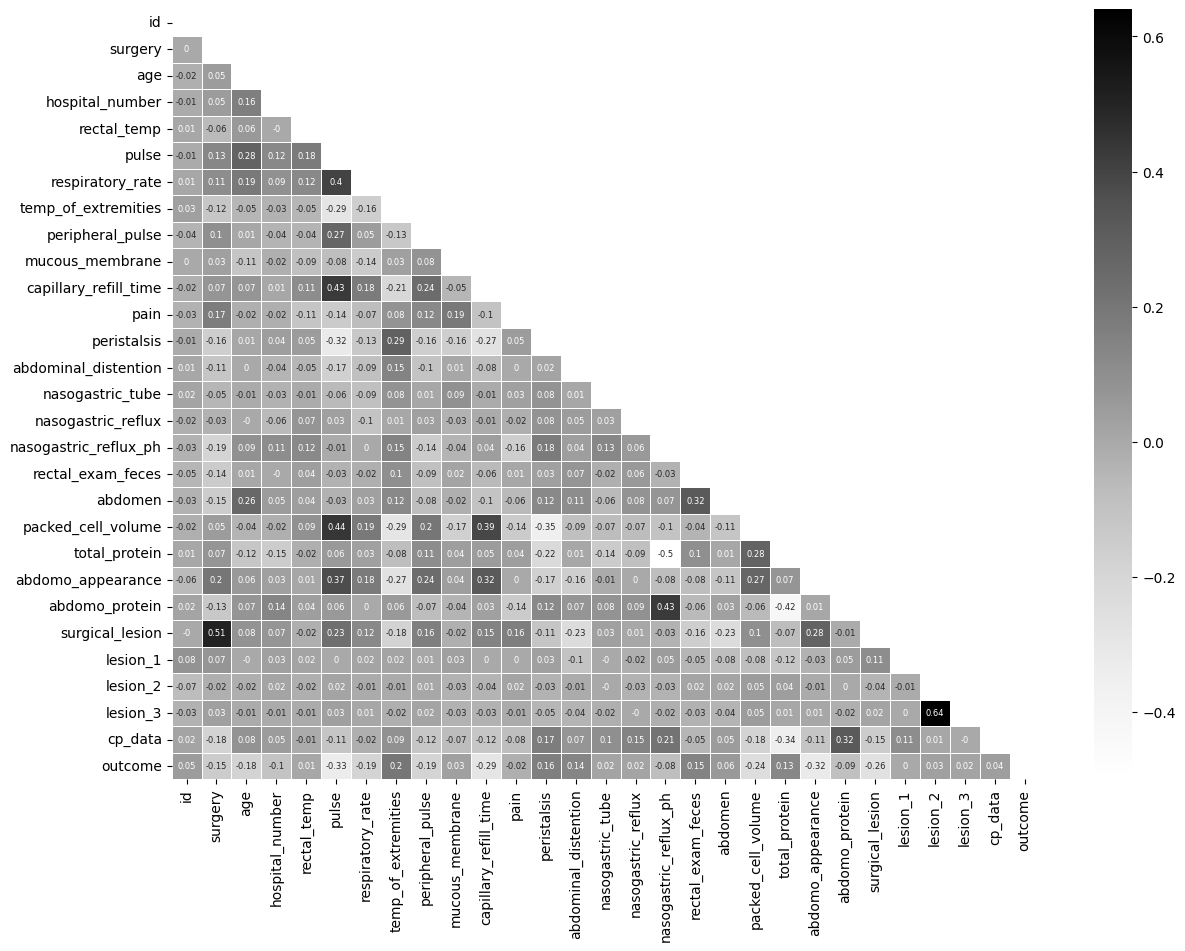

In [26]:

excluded_columns = ['id']
#sns.heatmap(matrix , annot=True)
fig, axes = plt.subplots(figsize=(14, 10))
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(matrix, mask=mask, linewidths=.5, cmap='Greys', annot=True, annot_kws={"size": 6})



plt.show()

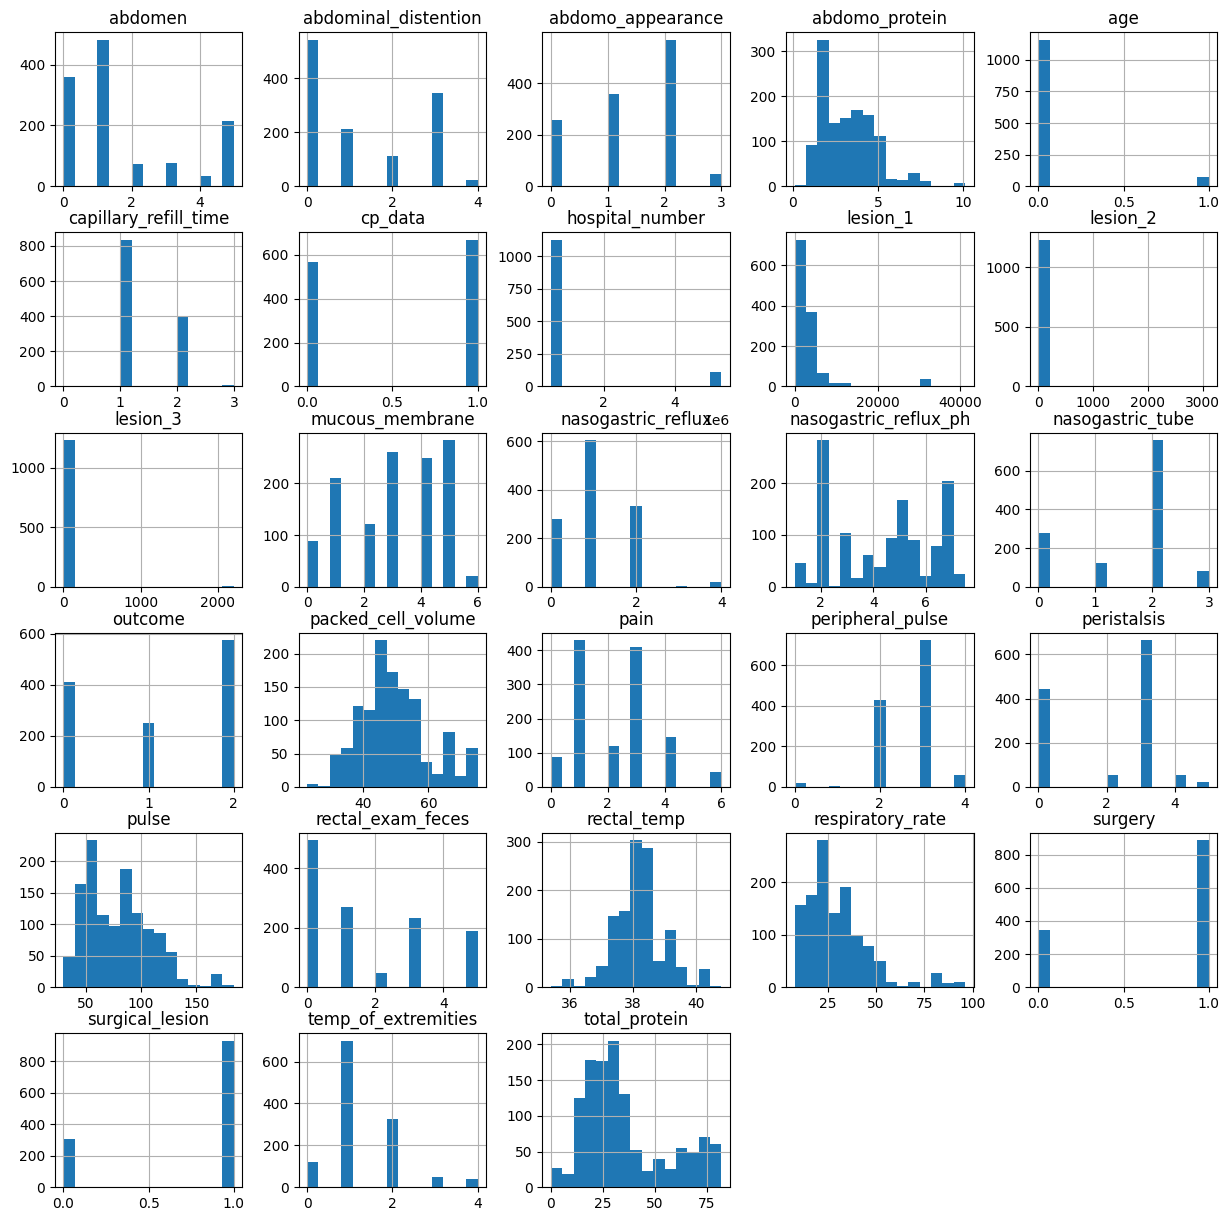

In [27]:
#Histograms of encoded data

exclude = ['id']
#The following ".loc[:, encoded_df.columns.difference(exclude)]" excludes id from being plotted on the histogram figure below

encoded_df.loc[:, encoded_df.columns.difference(exclude)].hist(figsize=(15,15), bins = 15)
plt.title("Features")
plt.show()

In [ ]:
#Boxplots for encoded data
for column in encoded_df:
    plt.figure()
    encoded_df.boxplot([column])
plt.show()